In [3]:
import pubchempy as pcp # Imports the library containing the infos on the molecules
from rdkit import Chem
from rdkit.Chem import Draw # Capasity to draw the molecule from the smile
from IPython.display import display # To have the molecule displayed in the notebook

def get_compound_info(molecule_name):
    try: # Try-except is to avoid errors to stop the code
        compounds = pcp.get_compounds(molecule_name, 'name') # Get compounds based on the molecule name

        if compounds:
            compound = compounds[0]  # Take the first result (assuming it's the correct one)
            iupac_name = compound.iupac_name
            smiles_code = compound.isomeric_smiles
            molar_mass = compound.molecular_weight
            atomic_formula = compound.molecular_formula
            # Retreaves the infos we want to display
            
            planar_molecule = Chem.MolFromSmiles(smiles_code)
            # Create a planar molecule object from the SMILES code
            
            stereo_centers = Chem.FindMolChiralCenters(planar_molecule, includeUnassigned=True)
            num_stereo_centers = len(stereo_centers)

            dict = {"iupac_name" : iupac_name,
                      "smiles_code" : smiles_code,
                      "molar_mass" : molar_mass,
                      "atomic_formula" : atomic_formula,
                      "planar_molecule" : planar_molecule,
                      "num_stereo_centers" : num_stereo_centers,
                      "stereo_centers" : stereo_centers}

            return dict
        else:
            return None
    except Exception as ex: # This part is just to avoid any error message to pop on the user's screen (would be terrible)
        return f"Error: {str(ex)}"



In [5]:
def label_stereogenic_centers(molecule, stereo_centers):
    for atom_idx, center_info in stereo_centers:
        atom = molecule.GetAtomWithIdx(atom_idx)
        neighbors = atom.GetNeighbors()
        
        # Calculate priorities for neighbors
        priorities = []
        for neighbor in neighbors:
            priority = neighbor.GetAtomicNum()  # Atomic number as priority
            priorities.append(priority)
        print(priorities)
        
        # Determine stereochemistry (R or S)
        if len(priorities) == 4: # No hydrogen
            # Sort priorities in descending order
            priorities.sort(reverse=True)
            if priorities[0]<priorities[1]<priorities[2]<priorities[3]:
                atom.SetProp("atomNote", "R")  # Rectus
            elif priorities[3]<priorities[2]<priorities[1]<priorities[0]:
                atom.SetProp("atomNote", "S")  # Sinister
            else:
                atom.SetProp("atomNote", "*")  # Unknown
        elif len(priorities) == 3: # One hydrogen
            # Sort priorities in descending order
            priorities.sort(reverse=True)
            if priorities[0]<priorities[1]<priorities[2]:
                atom.SetProp("atomNote", "R")  # Rectus
            elif priorities[2]<priorities[1]<priorities[0]:
                atom.SetProp("atomNote", "S")  # Sinister
            else:
                atom.SetProp("atomNote", "*")  # Unknown
        else:
            atom.SetProp("atomNote", "*")  # Unknown (not a stereocenter)


molecule name: thymidine


IUPAC Name: 1-[(2R,4S,5R)-4-hydroxy-5-(hydroxymethyl)oxolan-2-yl]-5-methylpyrimidine-2,4-dione
SMILES Code: CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)CO)O
Atomic Formula: C10H14N2O5
Molar Mass: 242.23 g/mol
Atomic Formula: C10H14N2O5
Stereogenic Centers: 3
[7, 6, 8]
[6, 6, 8]
[6, 8, 6]


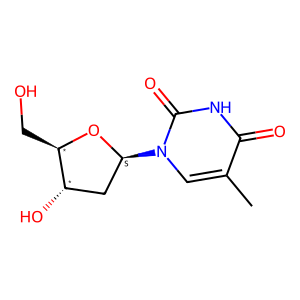

In [7]:

molecule_name = input("molecule name:")
result = get_compound_info(molecule_name)
if result:
    print(f"IUPAC Name: {result['iupac_name']}")
    print(f"SMILES Code: {result['smiles_code']}")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Molar Mass: {result['molar_mass']} g/mol")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Stereogenic Centers: {result['num_stereo_centers']}")

    
    label_stereogenic_centers(result["planar_molecule"], result["stereo_centers"])# Label stereogenic centers
    
    img = Draw.MolToImage(result['planar_molecule'])
    display(img)
else:
    print(f"No compound found for '{molecule_name}'")
    


In [8]:
import py3Dmol
from rdkit.Chem import AllChem

molecule_3D = Chem.AddHs(result['planar_molecule']) # Gets the 3D structure of the molecule
AllChem.EmbedMolecule(molecule_3D) # Makes that the molecule is not planar


# Helpful function from exercises 5
def drawit(m,p=None,confId=-1): # m is the molecule, p is the 3D object
        mb = Chem.MolToMolBlock(m,confId=confId) #Converts the molecule to a MolBlock (SDF format, the big table of coords) for visualization
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick': {}, 'sphere': {'colorscheme': 'Jmol', 'scale': 0.3}}) # Style of the molecule
        p.setBackgroundColor('#FFFFFF') # Background color (here white)
        p.zoomTo() # Zooming option
        return p.show()

drawit(molecule_3D)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.